# Hypothesis Testing Basics 

Hypothesis testing provides a **formal way to reason about uncertainty and evidence**.  
In machine learning, it helps answer questions like:
- Did this change really improve the model?
- Is this feature actually useful?
- Are two datasets meaningfully different?

This notebook focuses on **intuition**, not mathematical derivations.

---

## A. Null and Alternative Hypotheses

### 1. Null Hypothesis (H₀)

**Idea**  
The null hypothesis represents the **status quo**.

> “Nothing changed.”  
> “Any observed difference is due to randomness.”

**ML intuition**
- A new feature has no effect on model performance.
- A new algorithm performs the same as the old one.
- Two datasets come from the same distribution.

**Example**
- H₀: New fertilizer does **not** increase crop yield.
- H₀: New model does **not** reduce validation loss.

---

### 2. Alternative Hypothesis (H₁)

**Idea**  
The alternative hypothesis represents a **meaningful change**.

> “Something real happened.”

**ML intuition**
- A new feature improves prediction accuracy.
- A hyperparameter change reduces error.
- A treatment causes a measurable effect.

**Example**
- H₁: New fertilizer **increases** crop yield.
- H₁: New model performs **better** than baseline.

---

## B. p-values 

### What a p-value tells you

The **p-value** answers the question:

> “If the null hypothesis were true, how surprising is the observed data?”

**Key intuition**
- Small p-value → data unlikely under H₀
- Large p-value → data plausible under H₀

**Common rule (not absolute)**
- p ≤ 0.05 → reject H₀
- p > 0.05 → insufficient evidence to reject H₀

---

### ML Perspective on p-values

- p-values do **not** measure model quality.
- They measure evidence against a null assumption.
- Useful for feature screening and model comparisons.

**Important caution**
A small p-value does **not** imply:
- Large effect
- Practical importance
- Better generalization

---

## C. Common Hypothesis Tests 

---

### 1. t-test

**What it compares**
- Means of two groups

**ML use cases**
- Comparing model performance before and after a change
- Testing whether a feature has a significant effect

**Example**
- Does Model A outperform Model B on validation accuracy?

---

### 2. Chi-square Test

**What it tests**
- Independence between categorical variables

**ML use cases**
- Feature selection for categorical data
- Detecting label-feature dependence

**Example**
- Is a categorical feature related to the target variable?

---

### 3. ANOVA

**What it compares**
- Means across more than two groups

**ML use cases**
- Comparing multiple model variants
- Evaluating different treatments or strategies

**Example**
- Do different learning rates produce different model performance?

---

## D. Confidence Intervals

### What they represent

A **confidence interval** gives a range of values that likely contains the true parameter.

**Interpretation**
> “We are reasonably confident the true value lies in this interval.”

---

### ML Intuition for Confidence Intervals

- Regression coefficients often come with confidence intervals.
- Narrow intervals → stable, reliable estimates.
- Wide intervals → uncertainty or insufficient data.

**Example**
- Weight estimate: 2.3 ± 0.5
- Indicates uncertainty around the learned parameter.

---

## E. Why Hypothesis Testing Matters in ML

| Concept | ML Relevance |
|------|-------------|
Null hypothesis | Baseline model |
Alternative hypothesis | Improved model |
p-value | Evidence strength |
Confidence interval | Parameter reliability |

---

## Key ML Takeaways

- Hypothesis testing is about **evidence, not certainty**.
- p-values help detect meaningful changes, not model superiority.
- Confidence intervals communicate uncertainty explicitly.
- These ideas support **model validation and interpretation**.

Hypothesis testing complements machine learning by providing **statistical discipline to data-driven decisions**.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,chi2_contingency

### 2. Null vs Alternative Hypothesis (ML intuition)
Example scenario

You trained a baseline model and a new model.
Question: Did the new model really improve performance, or is the difference just noise?

### 3. t-test: Comparing model performance

This is one of the most common hypothesis tests in ML practice.

Simulated validation accuracies

In [3]:
baseline_acc = np.random.normal(loc=0.80,scale=0.02,size=30)
new_model_acc = np.random.normal(loc=0.83,scale=0.02,size=30)


### Hypotheses
* H₀: Mean accuracy of both models is the same
* H₁: Mean accuracy is different (or higher for new model)

### Run t-test

In [5]:
t_stat, p_value = ttest_ind(new_model_acc,baseline_acc)
t_stat,p_value

(5.463522183247389, 1.0245595376753343e-06)

### ML interpretation
* Small p-value → improvement unlikely due to chance
* Large p-value → improvement not statistically convincing

This is how you justify:

> “This change actually improved the model.”

### 4. Visual intuition (important for ML thinking)

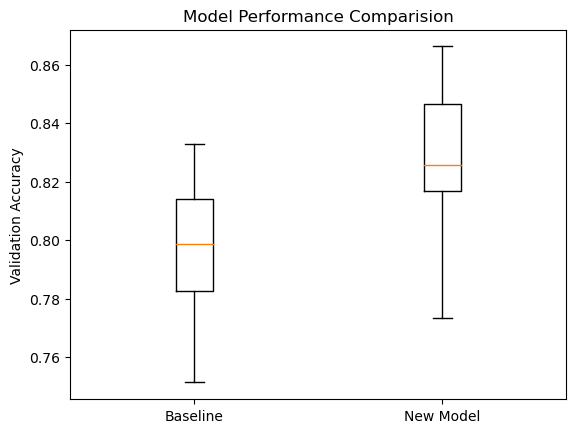

In [6]:
plt.boxplot([baseline_acc,new_model_acc],labels=["Baseline","New Model"])
plt.ylabel("Validation Accuracy")
plt.title("Model Performance Comparision")
plt.show()

If the boxes overlap heavily, p-values are usually large.

### 5. Chi-square test: Feature relevance (categorical data)

Used heavily in feature engineering.

#### Example

Does a categorical feature relate to the target?

In [7]:
# Contingency table (feature vs label)
# Rows: Feature present/absent
# Columns: Class 0 / Class 1
contingency_table = np.array([
    [40,10],
    [20,30]
])

### Run chi-square test

In [8]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table) 
p_value

0.00010516355403363114

#### ML interpretation
* Small p-value → feature and label are dependent
* Large p-value → feature adds little information

#### Used in:
* Feature selection
* Exploratory data analysis
* Categorical data pipelines

### 6. ANOVA intuition (no formulas)

ANOVA answers:

> “Do multiple model versions perform differently?”

#### Simulated results from 3 learning rates

In [9]:
model_lr_1 = np.random.normal(0.78, 0.02, 30)
model_lr_2 = np.random.normal(0.80, 0.02, 30)
model_lr_3 = np.random.normal(0.83, 0.02, 30)


ANOVA checks whether at least one group mean differs.

#### ML intuition:
* Use when comparing many experiments
* Avoids running many pairwise t-tests

### 7. Confidence Intervals (parameter uncertainty)

Very common in regression outputs.

Sample mean confidence interval

In [10]:
sample = np.random.normal(loc = 10, scale=2, size=100)
mean = sample.mean()
std = sample.std(ddof=1)
n = len(sample)

# 95% confidence interval
marginal = 1.96* (std/np.sqrt(n))
(mean-marginal,mean+marginal)

(9.658293174359303, 10.39254872852023)

#### ML interpretation
* Narrow interval → stable estimate
* Wide interval → uncertain parameter
* Helps interpret learned coefficients

### 8. p-values vs practical importance 

In [11]:
# Tiny difference but large sample
a = np.random.normal(0,1,10000)
b = np.random.normal(0.02,1,10000)

ttest_ind(a,b).pvalue

0.004491871548066245

#### ML lesson:
* Very small p-value does not mean large improvement
* Always combine: **Statistical significance**, **Effect size**, **Validation performance**

### 9. How this fits into real ML workflows
|Task|	Test / Concept|
|------|------|
|Model comparison|	t-test|
|Feature selection	|chi-square|
|Hyperparameter studies|	ANOVA|
|Coefficient reliability	|Confidence intervals|
|Experiment decisions|	p-values|

#### Final ML Takeaway
* Hypothesis testing helps you trust results, not guess
* p-values measure evidence, not performance
* Confidence intervals communicate uncertainty
* These tools prevent overclaiming improvements

### Example 1: Feature usefulness after feature engineering
Scenario

You engineer a new numerical feature and want to know whether it actually changes the target distribution.

#### Question

Does the target mean differ when the feature is present vs absent?

In [13]:
import numpy as np
from scipy.stats import ttest_ind

np.random.seed(0)

# Target values when feature is absent
y_without = np.random.normal(50, 5, 100)

# Target values when feature is present
y_with = np.random.normal(55, 5, 100)

t_stat, p_value = ttest_ind(y_with, y_without)
t_stat, p_value


(7.041427369013252, 3.059820094514429e-11)

#### ML intuition
* H₀: Feature has no effect
* Small p-value → feature likely meaningful
* Helps decide whether to keep engineered features

### Example 2: A/B testing a preprocessing choice
Scenario

You try two scalers:
* StandardScaler
* MinMaxScaler

We compare cross-validation scores.

In [14]:
scaler_A_scores = np.random.normal(0.81, 0.015, 20)
scaler_B_scores = np.random.normal(0.82, 0.015, 20)

ttest_ind(scaler_B_scores, scaler_A_scores)


Ttest_indResult(statistic=1.0782709571724132, pvalue=0.28771018769935824)

#### ML intuition
* Hypothesis testing adds discipline to A/B experiments
* Prevents overinterpreting random fluctuations
* Especially useful when differences are small

### Example 3: Chi-square test for label leakage detection
Scenario

You suspect a categorical feature leaks label information.

In [15]:
import pandas as pd
from scipy.stats import chi2_contingency

data = {
    "feature": ["A","A","A","B","B","B","B","A","A","B"],
    "label":   [1,1,1,0,0,0,0,1,1,0]
}

df = pd.DataFrame(data)

contingency = pd.crosstab(df["feature"], df["label"])
chi2_contingency(contingency)[1]


0.01141203638600166

#### ML intuition
* Extremely small p-value → feature almost encodes the label
* Warning sign for leakage
* Helps catch bugs before model deployment

### Example 4: Confidence intervals for model coefficients
Scenario

You fit a simple regression and want to understand coefficient reliability.

In [16]:
import statsmodels.api as sm

X = np.random.randn(100, 2)
y = 3*X[:,0] + np.random.randn(100)

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

model.conf_int()


array([[-0.31613478,  0.12179759],
       [ 2.76009026,  3.20104794],
       [-0.24916202,  0.20280836]])

#### ML intuition
* If CI includes 0 → coefficient may not matter
* Wide CI → unstable estimate
* This is how statisticians judge feature importance

### Example 5: When p-values mislead (very important)
Scenario

Huge dataset, tiny effect.

In [18]:
a = np.random.normal(0, 1, 50000)
b = np.random.normal(0.01, 1, 50000)

ttest_ind(a, b).pvalue


0.0013190543444434315

#### ML intuition
* p-value is extremely small
* Effect size is negligible
* Model performance will not improve meaningfully

Lesson:

> Statistical significance ≠ practical usefulness

### Example 6: Hypothesis testing vs cross-validation
Scenario

You compare two models using CV scores.

In [19]:
model_A = np.random.normal(0.78, 0.03, 10)
model_B = np.random.normal(0.80, 0.03, 10)

ttest_ind(model_B, model_A)


Ttest_indResult(statistic=0.36413734095882266, pvalue=0.7199977570422659)

##### ML intuition
* Hypothesis tests complement cross-validation
* CV measures performance
* Tests measure evidence of difference

Best practice:
* Use both, not one alone

### Example 7: Confidence interval shrinking with more data
Scenario

See how more data reduces uncertainty.

In [20]:
import numpy as np

def confidence_interval(data):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    n = len(data)
    margin = 1.96 * std / np.sqrt(n)
    return mean - margin, mean + margin

small_sample = np.random.normal(10, 2, 30)
large_sample = np.random.normal(10, 2, 3000)

confidence_interval(small_sample), confidence_interval(large_sample)


((9.611920087920815, 11.057608298389354),
 (9.967242062323432, 10.108612854317606))

##### ML intuition
* More data → tighter intervals
* Explains why large datasets generalize better
* Reinforces Law of Large Numbers

##### Big-picture ML takeaway

Think of hypothesis testing as answering:
* “Is this improvement real?”
* “Is this feature doing anything?”
* “Am I seeing signal or noise?”

It does not replace ML metrics, but it:
* Prevents false confidence
* Improves experimental rigor
* Sharpens intuition about uncertainty